Practical implementation of Regression Techniques
*   Simple Linear Regression with Polynomial


Objective: To predict house prices on Boston Housing Data

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read boston housing dataset
dataset=pd.read_csv("/content/HousingData.csv")

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Check the shape of dataframe
dataset.shape

(506, 14)

In [5]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# Identifying the unique number of values in the dataset
dataset.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [7]:
# Check for missing values
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# Viewing the data statistics
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# Finding out the correlation between the features
corr = dataset.corr()
corr.shape

(14, 14)

<Axes: >

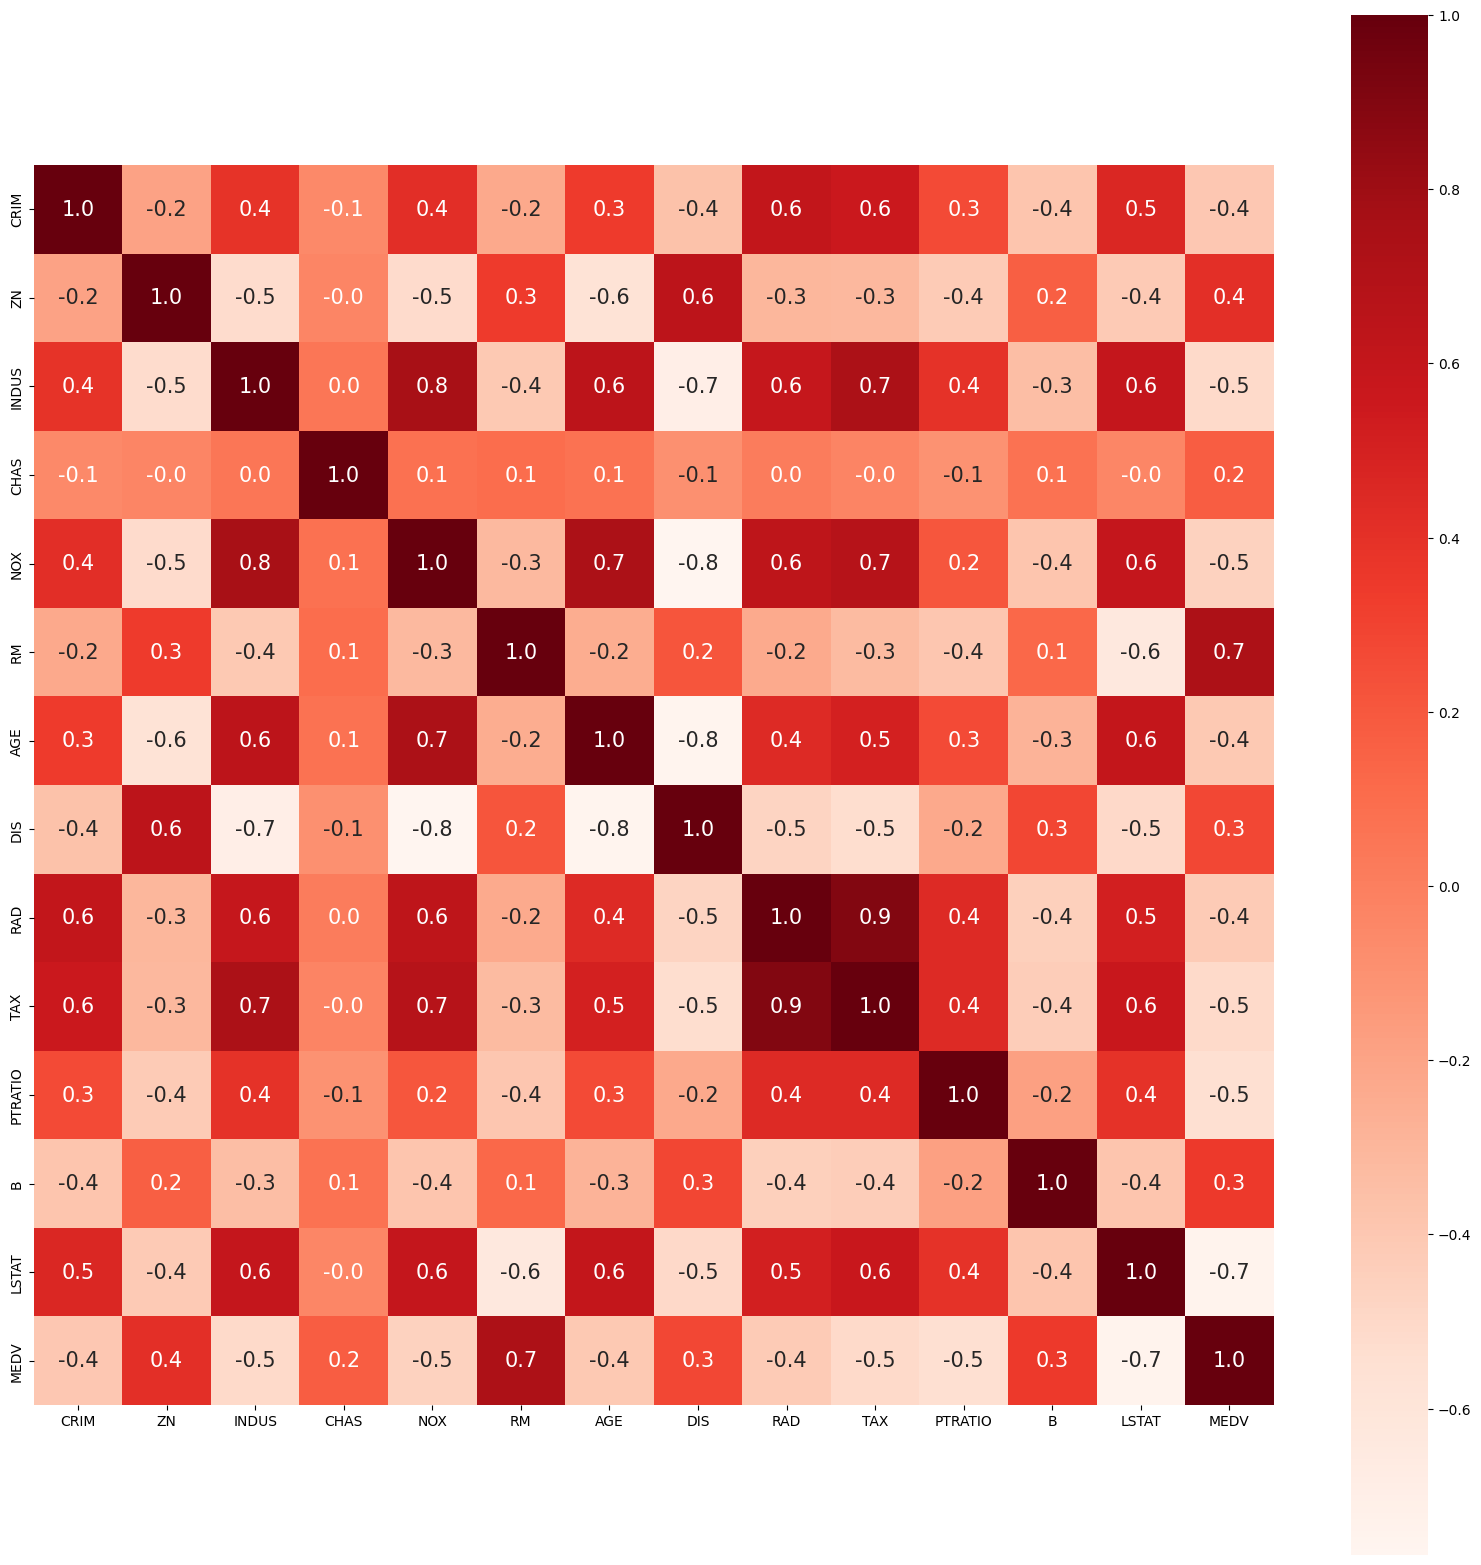

In [12]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds')

In [13]:
# Spliting target variable and independent variables
x = dataset[['RM']]
y = dataset[['MEDV']]

In [14]:
x


,RM
0,6.575
1,6.421
2,7.185
3,6.998
5,6.430
...,...
499,5.569
500,6.027
502,6.120
503,6.976


In [15]:
y


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7
...,...
499,17.5
500,16.8
502,20.6
503,23.9


In [16]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4)

Linear Regression

Training the model

In [19]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# Value of y intercept
lm.intercept_

array([-37.44048762])

In [21]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,RM,[9.532492359180607]


Model Prediction

In [22]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [23]:
from sklearn import metrics

In [24]:
# Model Evaluation on train data
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 4.000756523483964
MSE: 33.07223956009026
RMSE: 5.750846855906551


MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

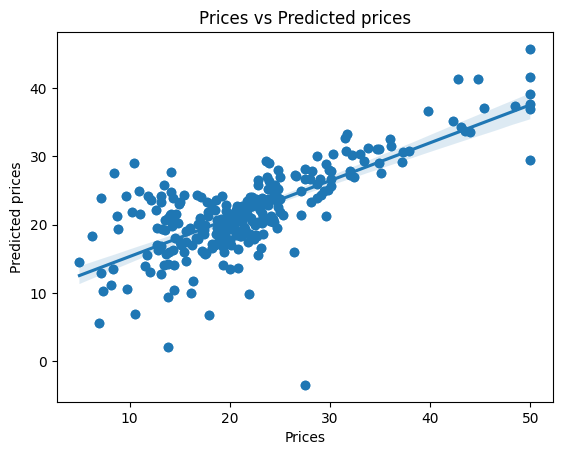

In [26]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
sns.regplot(x=y_train, y=y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

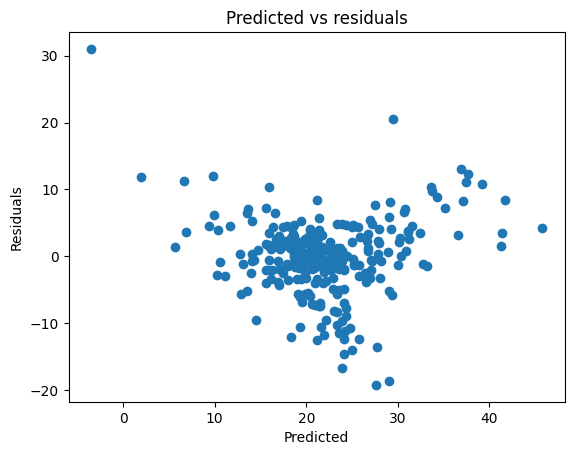

In [27]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

<ipython-input-28-c62ec83682b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


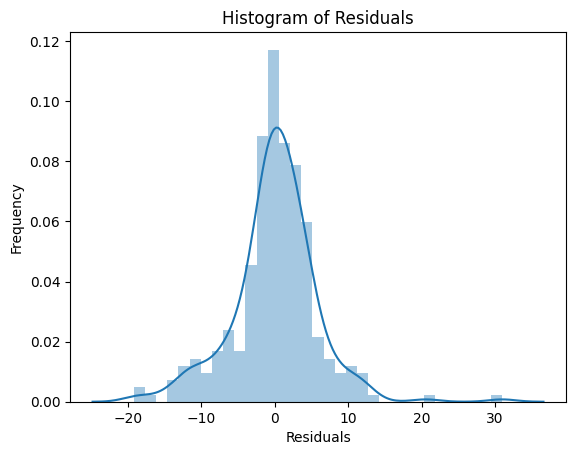

In [28]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

Apply on Test Data

In [29]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

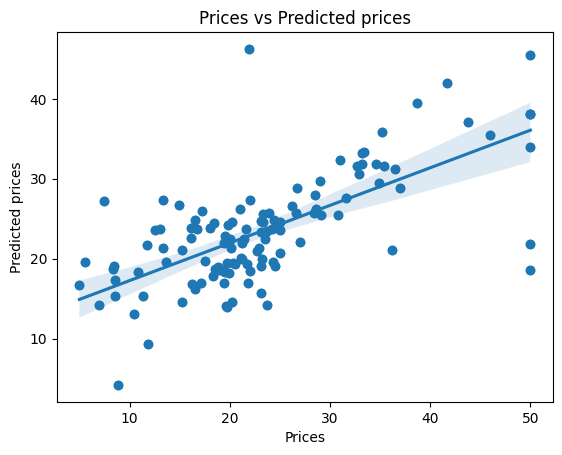

In [31]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
sns.regplot(x=y_test, y=y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [32]:
# Model Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 4.972140970836248
MSE: 54.97103443822725
RMSE: 7.414245372135134


We can conclude that the straight regression line is unable to capture the patterns in the data. This is an example of underfitting. To overcome underfitting, we need to increase the complexity of the model. This could be done by converting the original features into their higher order polynomial terms by using the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.

In [33]:
from sklearn.preprocessing import PolynomialFeatures


In [34]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=1)

# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

<ipython-input-35-7684c569bbe9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_residual, bins=15)
<ipython-input-35-7684c569bbe9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_residual, bins=15)


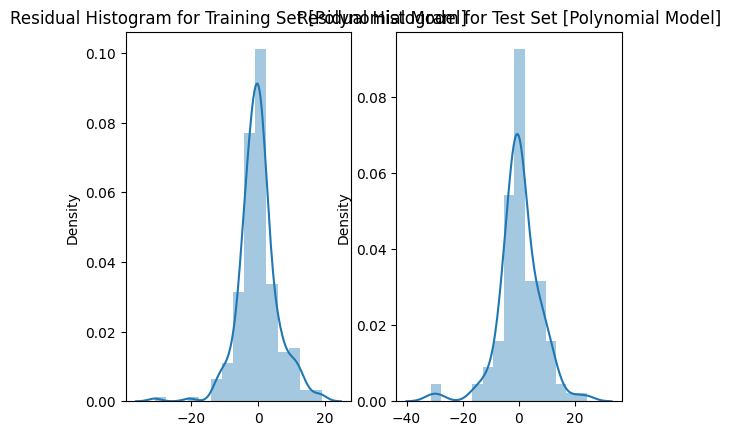

In [35]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

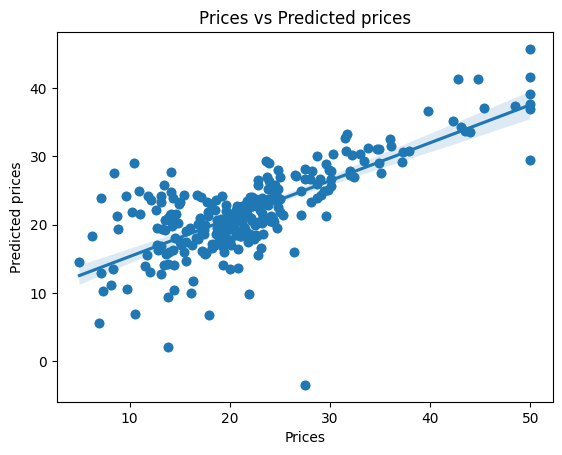

In [36]:
plt.scatter(y_train, y_train_predicted)
sns.regplot(x=y_train, y=y_train_predicted)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

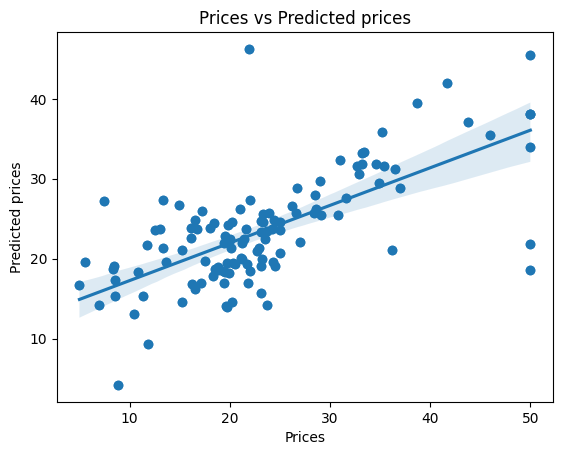

In [38]:
plt.scatter(y_test, y_test_predicted)
sns.regplot(x=y_test, y=y_test_predicted)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [39]:
# Model Evaluation on train data
print('MAE:',metrics.mean_absolute_error(y_train, y_train_predicted))
print('MSE:',metrics.mean_squared_error(y_train, y_train_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))

MAE: 4.000756523483963
MSE: 33.07223956009027
RMSE: 5.750846855906551


In [40]:
# Model Evaluation on train data
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predicted))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

MAE: 4.9721409708362465
MSE: 54.971034438227264
RMSE: 7.4142453721351345
